# 範例

透過 SIFT 特徵實作 Brute-Force Matching

In [38]:
import cv2
import numpy as np

# 以灰階方式讀入圖片
img_query = cv2.imread('data/box.png', 0)
img_train = cv2.imread('data/box_in_scene.png', 0)

# 建立 SIFT 物件
sift = cv2.xfeatures2d_SIFT.create()

# 偵測並計算 SIFT 特徵 (keypoints 關鍵點, descriptor 128 維敘述子)
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)

## 基於 SIFT 特徵的暴力比對

- D.Lowe ratio test
- knn 比對

In [109]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L2)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(des_query, des_train, k=2)

# 透過 D.Lowe ratio test 排除不適合的配對
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidate.append([m])

# 顯示配對結果
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)

# 顯示圖片
while True:
    cv2.imshow('matches', img_show)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

思考 Brute-Force Matching 在應用上是否有甚麼限制
--> BF matching 實際上就是將 SIFT 找出的特徵點 以kNN方式暴力比對 而kNN最大缺點就是時間複雜度高、空間複雜度高，訓練模型依賴訓練集資料且不可丟棄。



特徵點 matching 是否還有其他的應用？panorama?
ref: https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83

In [122]:
img = cv2.imread('data/panorama_left.jpeg')
img_left = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_ = cv2.imread('data/panorama_right.jpeg')
img_right = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)


In [123]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp_l, des_l = sift.detectAndCompute(img_left,None)
kp_r, des_r = sift.detectAndCompute(img_right,None)

In [124]:
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des_r, des_l, k=2)

In [125]:
#candidate = []
#for m in matches:
#    if m[0].distance < 0.7*m[1].distance:
#        candidate.append(m)
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidate.append([m])
matches = np.asarray(candidate)

In [126]:
if len(matches[:,0]) >= 4:
    src = np.float32([kp_r[m.queryIdx].pt for m in matches[:,0]]).reshape(-1,1,2)
    dst = np.float32([kp_l[m.trainIdx].pt for m in matches[:,0]]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
#print H
else:
    raise AssertionError('Can’t find enough keypoints.')

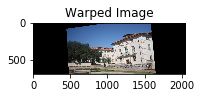

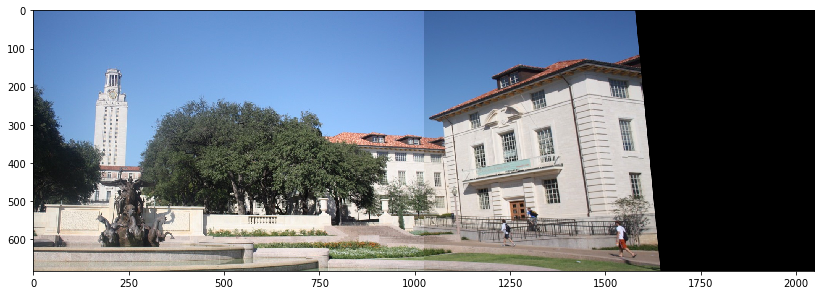

In [133]:
import matplotlib.pyplot as plt
dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Warped Image')
plt.show()
plt.figure(figsize = (14,8))
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite('output.jpg',dst)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()